# Blackjack Simulator: Cheating Dealer Edition 🎲🃏

This Jupyter Notebook is an interactive **Blackjack game simulator** designed to explore probabilities, strategies and the impact of a **weighted (cheating) dealer**.

## Overview
The project simulates rounds of Blackjack between a player and a dealer, implementing standard Blackjack rules:
- Cards 2–10 are valued at their number  
- J, Q, K = 10  
- Ace = 1 or 11 (whichever benefits the hand)

The dealer uses a **weighted deck**, increasing the likelihood of drawing high value cards, giving them an advantage over the player. This allows for analysis of how “cheating” affects game outcomes.

## Features
- Simulate **single or multiple rounds** of Blackjack  
- Track **player and dealer hand totals** and round outcomes  
- Compare results with a **normal dealer vs. cheating dealer**  
- Generate **visualisations**: bar charts, histograms, and cumulative win rates  
- Explore **probabilities, expected values, and game strategies**  

This notebook is a combination of **game simulation, probability analysis, and data visualisation**, demonstrating Python programming and interactive notebook design.


In [389]:
import random
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [390]:
deck = {
    '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10,
    'J': 10, 'Q': 10, 'K': 10, 'A': 11
}

In [391]:

#  if want to do single round simulation, uncomment below

# # Draw cards for player and dealer
# playerHand = random.choices(
#     population=list(deck.keys()),
#     weights=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
#     k=2
# )

# dealerHand = random.choices(
#     population=list(deck.keys()),
#     weights=[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
#     k=2
# )
# print("Dealer Hand:", dealerHand[0], "?")
# print("Player Hand:",playerHand)
# print("Total:", sum([deck[card] for card in playerHand]))


# # Single round simulation
# while True:
#     choice = input("Do you want to hit or stand? (h/s): ").lower()
#     if choice == 'h':
#         card = random.choices(
#     population=list(deck.keys()),
#     weights=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
#     k=1)
#         playerHand.append(card[0])
#         total = sum([deck[card] for card in playerHand])
#         print("Player Hand:", playerHand)
#         print("Total:", total)
#         if total > 21:
#             print("Bust! You lose.")
#             exit()
#     elif choice == 's':
#         break


# # Dealer's turn
# print("Dealer's turn...")
# print("Dealer Hand:", dealerHand)
# while sum([deck[card] for card in dealerHand]) < 17:
#     card = random.choices(
#         population=list(deck.keys()),
#         weights=[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
#         k=1
#     )
#     dealerHand.append(card[0])
#     print("Dealer Hand:", dealerHand)
# dealerTotal = sum([deck[card] for card in dealerHand])
# playerTotal = sum([deck[card] for card in playerHand])
# print("Dealer Total:", dealerTotal)
# print("Player Total:", playerTotal)
# # Determine winner
# if dealerTotal > 21 or playerTotal > dealerTotal:
#     print("You win!")
# elif playerTotal < dealerTotal:
#     print("Dealer wins!")
# else:
#     print("It's a tie!")




In [392]:
# play n rounds and collect statistics
n = int(input("Enter number of rounds to simulate: "))
results = {'Player Wins': 0, 'Dealer Wins': 0, 'Ties': 0}
playerTotalSum = 0
dealerTotalSum = 0
for _ in range(n):
    # Draw cards for player and dealer
    playerHand = random.choices(
        population=list(deck.keys()),
        weights=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        k=2
    )
    dealerHand = random.choices(
        population=list(deck.keys()),
        weights=[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
        k=2
    )

    # Player's turn (simple strategy: hit until 17 or higher)
    while sum([deck[card] for card in playerHand]) < 17:
        card = random.choices(
            population=list(deck.keys()),
            weights=[1,1,1,1,1,1,1,1,1,1,1,1,1],
            k=1
        )
        playerHand.append(card[0])
        if sum([deck[card] for card in playerHand]) > 21:
            results['Dealer Wins'] += 1
            break
    else:
        # Dealer's turn
        while sum([deck[card] for card in dealerHand]) < 17:
            card = random.choices(
                population=list(deck.keys()),
                weights=[1,1,1,1,1,1,1,2,2,2,2,2,2],
                k=1
            )
            dealerHand.append(card[0])
        dealerTotal = sum([deck[card] for card in dealerHand])
        playerTotal = sum([deck[card] for card in playerHand])
        if dealerTotal > 21 or playerTotal > dealerTotal:
            results['Player Wins'] += 1
        elif playerTotal < dealerTotal:
            results['Dealer Wins'] += 1
        else:
            results['Ties'] += 1
        
        playerTotalSum += sum([deck[card] for card in playerHand])
        dealerTotalSum += sum([deck[card] for card in dealerHand])
print("After", n, "rounds:")
print(results)

After 50000 rounds:
{'Player Wins': 18589, 'Dealer Wins': 26385, 'Ties': 5026}


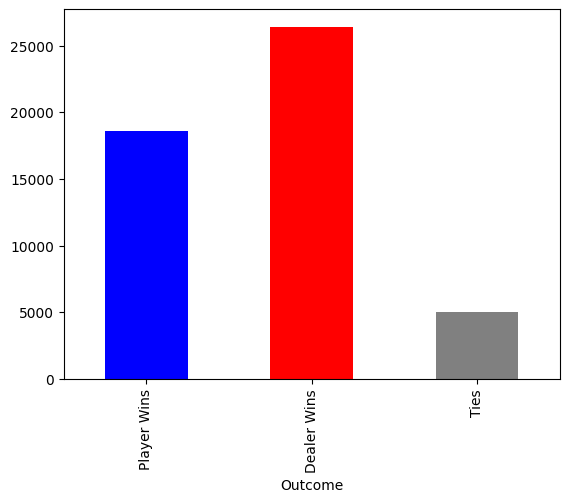

Probabilities: {'Player Wins': 0.37178, 'Dealer Wins': 0.5277, 'Ties': 0.10052}
Average hand value for player: 12.97104
Average hand value for dealer: 14.09484


In [393]:
df = pd.DataFrame(list(results.items()), columns=['Outcome', 'Count'])
df.plot(kind='bar', x='Outcome', y='Count', legend=False, color=['blue', 'red', 'gray'])
matplotlib.pyplot.show()
probabilities = {key: value / n for key, value in results.items()}
print("Probabilities:", probabilities)

average_hand = playerTotalSum / n
print("Average hand value for player:", average_hand)
average_dealer_hand = dealerTotalSum / n
print("Average hand value for dealer:", average_dealer_hand)
preResults = [results, playerTotalSum, dealerTotalSum]


## Set up Q-Learning

**State** - player's total sum, dealer's visible card   
**Action** - hit or stand  
**Reward** - +1 for win, -1 for loss, 0 for tie  
**Hyperparameters** - learning rate, discount factor, exploration rate  

*Learning rate* - How much new information overrides old  
*Discount factor* - importance of future rewards  
*Exploration rate* - probability of choosing random action  



In [394]:
playerTotalSum = 0
dealerTotalSum = 0
results = {'Player Wins': 0, 'Dealer Wins': 0, 'Ties': 0}

actions = ['hit', 'stand']
q_table = {}
learning_rate = 0.1
discount_factor = 0.9
exploration_rate = 1.0
exploration_decay = 0.995
min_exploration_rate = 0.01
for player_sum in range(4, 22):
    for dealer_card in range(2, 12):
        q_table[(player_sum, dealer_card)] = {action: 0.0 for action in actions}

n = int(input("Enter number of rounds to simulate with Q-learning: "))


In [395]:
# simulate n rounds with Q-learning

for _ in range(n):
    # Draw cards for player and dealer
    playerHand = random.choices(
        population=list(deck.keys()),
        weights=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        k=2
    )
    dealerHand = random.choices(
        population=list(deck.keys()),
        weights=[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
        k=2
    )
    player_sum = sum([deck[card] for card in playerHand])
    dealer_card = deck[dealerHand[0]]
    state = (player_sum, dealer_card)
    while True:
        if player_sum >= 21:
            action = 'stand'
        elif random.random() < exploration_rate:
            action = random.choice(actions)
        else:
            if state not in q_table:
                q_table[state] = {a: 0.0 for a in actions}
            action = max(q_table[state], key=q_table[state].get)

        if action == 'hit':
            card = random.choices(
                population=list(deck.keys()),
                weights=[1,1,1,1,1,1,1,1,1,1,1,1,1],
                k=1
            )
            playerHand.append(card[0])
            player_sum = sum([deck[card] for card in playerHand])
            if player_sum > 21:
                results['Dealer Wins'] += 1
                reward = -1
                next_state = None
                if state not in q_table:
                    q_table[state] = {a: 0.0 for a in actions}
                old_value = q_table[state][action]
                q_table[state][action] = (1 - learning_rate) * old_value + learning_rate * reward
                break
            elif player_sum == 21:
                reward = 1
                next_state = None
                if state not in q_table:
                    q_table[state] = {a: 0.0 for a in actions}
                old_value = q_table[state][action]
                q_table[state][action] = (1 - learning_rate) * old_value + learning_rate * reward
                break
            else:
                next_state = (player_sum, dealer_card)
                reward = 0
        else:  # stand
            while sum([deck[card] for card in dealerHand]) < 17:
                card = random.choices(
                    population=list(deck.keys()),
                    weights=[1,1,1,1,1,1,1,2,2,2,2,2,2],
                    k=1
                )
                dealerHand.append(card[0])
            dealerTotal = sum([deck[card] for card in dealerHand])
            playerTotal = sum([deck[card] for card in playerHand])
            if dealerTotal > 21 or playerTotal > dealerTotal:
                results['Player Wins'] += 1
                reward = 1
            elif playerTotal < dealerTotal:
                results['Dealer Wins'] += 1
                reward = -1
            else:
                results['Ties'] += 1
                reward = 0
            next_state = None
            break
        old_value = q_table[state][action]
        next_max = max(q_table[next_state].values()) if next_state else 0
        new_value = (1 - learning_rate) * old_value + learning_rate * (reward + discount_factor * next_max)
        q_table[state][action] = new_value
        state = next_state
    exploration_rate *= exploration_decay




After 50000 rounds with Q-learning:
{'Player Wins': 19780, 'Dealer Wins': 26848, 'Ties': 3090}


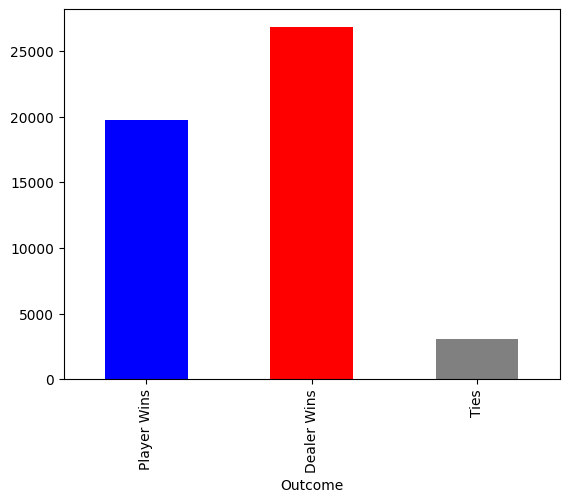

Probabilities with Q-learning: {'Player Wins': 0.3956, 'Dealer Wins': 0.53696, 'Ties': 0.0618}
Learned strategy (player_sum, dealer_card): action
(4, 2) : hit
(4, 3) : hit
(4, 4) : hit
(4, 5) : hit
(4, 6) : hit
(4, 7) : hit
(4, 8) : hit
(4, 9) : hit
(4, 10) : hit
(4, 11) : hit
(5, 2) : hit
(5, 3) : hit
(5, 4) : hit
(5, 5) : hit
(5, 6) : hit
(5, 7) : hit
(5, 8) : hit
(5, 9) : hit
(5, 10) : hit
(5, 11) : hit
(6, 2) : hit
(6, 3) : hit
(6, 4) : hit
(6, 5) : hit
(6, 6) : hit
(6, 7) : hit
(6, 8) : hit
(6, 9) : hit
(6, 10) : hit
(6, 11) : hit
(7, 2) : hit
(7, 3) : hit
(7, 4) : hit
(7, 5) : hit
(7, 6) : hit
(7, 7) : hit
(7, 8) : hit
(7, 9) : hit
(7, 10) : hit
(7, 11) : hit
(8, 2) : hit
(8, 3) : hit
(8, 4) : hit
(8, 5) : hit
(8, 6) : hit
(8, 7) : hit
(8, 8) : hit
(8, 9) : hit
(8, 10) : hit
(8, 11) : hit
(9, 2) : hit
(9, 3) : hit
(9, 4) : hit
(9, 5) : hit
(9, 6) : hit
(9, 7) : hit
(9, 8) : hit
(9, 9) : hit
(9, 10) : hit
(9, 11) : hit
(10, 2) : hit
(10, 3) : hit
(10, 4) : hit
(10, 5) : hit
(10, 6

In [396]:
# results of Q-learning simulation
print("After", n, "rounds with Q-learning:")
print(results)
df = pd.DataFrame(list(results.items()), columns=['Outcome', 'Count'])
df.plot(kind='bar', x='Outcome', y='Count', legend=False, color=['blue', 'red', 'gray'])
matplotlib.pyplot.show()
probabilities = {key: value / n for key, value in results.items()}
print("Probabilities with Q-learning:", probabilities)

# what strategy did Q-learning learn?

strategy = {}
for state, actions in q_table.items():
    best_action = max(actions, key=actions.get)
    strategy[state] = best_action

print("Learned strategy (player_sum, dealer_card): action")
for state, action in strategy.items():
    print(state, ":", action)

playerTotalSum = 0
dealerTotalSum = 0
results = {'Player Wins': 0, 'Dealer Wins': 0, 'Ties': 0}


After 50000 rounds without exploration:
{'Player Wins': 21824, 'Dealer Wins': 25195, 'Ties': 2981}


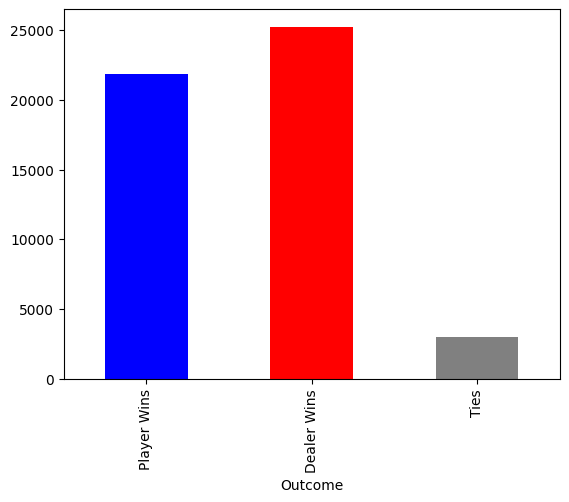

Average hand value for player: 15.93932
Average hand value for dealer: 20.58058
Probabilities without exploration: {'Player Wins': 0.43648, 'Dealer Wins': 0.5039, 'Ties': 0.05962}


In [397]:
playerTotalSum = 0
dealerTotalSum = 0
results = {'Player Wins': 0, 'Dealer Wins': 0, 'Ties': 0}

for _ in range(n):
    # Draw cards
    playerHand = random.choices(list(deck.keys()), k=2)
    dealerHand = random.choices(list(deck.keys()), k=2)

    player_sum = sum(deck[card] for card in playerHand)
    dealer_card = deck[dealerHand[0]]
    state = (player_sum, dealer_card)

    while True:
        # Force stand at 21 or more
        if player_sum >= 21:
            action = 'stand'
        else:
            # Greedy action from Q-table
            if state not in q_table:
                q_table[state] = {a: 0.0 for a in actions}
            action = max(q_table[state], key=q_table[state].get)

        if action == 'hit':
            card = random.choices(list(deck.keys()), k=1)[0]
            playerHand.append(card)
            player_sum = sum(deck[card] for card in playerHand)

            if player_sum > 21:  # bust
                results['Dealer Wins'] += 1
                break
            else:
                state = (player_sum, dealer_card)
        else:  # stand
            dealer_sum = sum(deck[card] for card in dealerHand)
            while dealer_sum < 17:
                card = random.choices(list(deck.keys()), k=1)[0]
                dealerHand.append(card)
                dealer_sum = sum(deck[card] for card in dealerHand)

            playerTotal = player_sum
            dealerTotal = dealer_sum

            if dealerTotal > 21 or playerTotal > dealerTotal:
                results['Player Wins'] += 1
            elif playerTotal < dealerTotal:
                results['Dealer Wins'] += 1
            else:
                results['Ties'] += 1
            break

    playerTotalSum += sum(deck[card] for card in playerHand)
    dealerTotalSum += sum(deck[card] for card in dealerHand)

# Show results
print("After", n, "rounds without exploration:")
print(results)
df = pd.DataFrame(list(results.items()), columns=['Outcome', 'Count'])
df.plot(kind='bar', x='Outcome', y='Count', legend=False, color=['blue', 'red', 'gray'])
plt.show()

# Probabilities
probabilities = {key: value / n for key, value in results.items()}
average_hand = playerTotalSum / n
average_dealer_hand = dealerTotalSum / n
print("Average hand value for player:", average_hand)
print("Average hand value for dealer:", average_dealer_hand)
print("Probabilities without exploration:", probabilities)
